In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import scienceplots

sys.path.append("../")
import csiborgtools

%matplotlib widget 
%load_ext autoreload
%autoreload 2

In [2]:
paths = csiborgtools.read.CSiBORGPaths(**csiborgtools.paths_glamdring)
partreader = csiborgtools.read.ParticleReader(paths)


nsim = 7444
nsnap = max(paths.get_snapshots(nsim))
box = csiborgtools.read.BoxUnits(nsnap, nsim, paths)

particle_archive = np.load(paths.split_path(nsnap, nsim))
clumpsarr = partreader.read_clumps(nsnap, nsim, cols=["index", 'x', 'y', 'z'])
clumpid2arrpos = {ind: ii for ii, ind in enumerate(clumpsarr["index"])}

In [3]:
nsim = 7444
cat = csiborgtools.read.ClumpsCatalogue(nsim, paths)

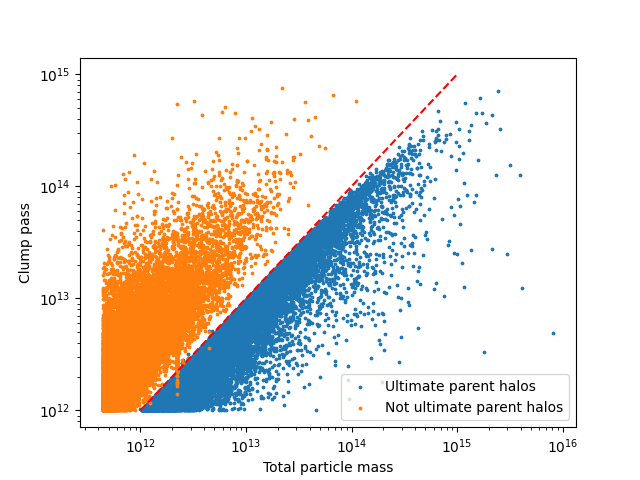

In [7]:
ismain = cat.ismain

plt.figure()
plt.scatter(cat['totpartmass'][ismain], cat['mass_cl'][ismain], s=3, label="Ultimate parent halos")
plt.scatter(cat['totpartmass'][~ismain], cat['mass_cl'][~ismain], s=3, label="Not ultimate parent halos")


t = np.linspace(1e12, 1e15, 1000)
plt.plot(t, t, c="red", ls="--")
plt.xlabel("Total particle mass")
plt.ylabel("Clump pass")
plt.legend()
plt.xscale("log")
plt.yscale("log")

plt.show()

In [73]:
clumpsarr["index"]

clid = 254

parts = particle_archive[str(clid)]
cl = clumpsarr[clumpid2arrpos[clid]]
obj = csiborgtools.fits.Clump(parts, cl, box)

In [74]:
obj.spherical_overdensity_mass(200, npart_min=10)

vol [0.00000000e+00 3.32115107e-16 4.81581641e-16 5.87423702e-16
 1.44851994e-15 1.85078012e-15 2.63955583e-15 2.90261970e-15
 4.28173545e-15 5.53875861e-15 6.68887773e-15 6.86202312e-15
 7.01465338e-15 8.30826073e-15 1.01585822e-14 1.02702542e-14
 1.14355030e-14 1.22888692e-14 1.45854855e-14 1.56146407e-14
 2.21683735e-14 2.25067479e-14 2.27528212e-14 2.46299004e-14
 2.52228099e-14 3.02901828e-14 3.46874256e-14 3.50482616e-14
 3.82345793e-14 3.87933026e-14 4.01219314e-14 4.14398367e-14
 4.77526615e-14 5.07159181e-14 5.25971038e-14 5.27192730e-14
 6.27722158e-14 6.81984308e-14 6.90808427e-14 7.94348243e-14
 8.72787424e-14 8.75415666e-14 1.04980098e-13 1.10300285e-13
 1.24084337e-13 1.27954328e-13 1.28989430e-13 1.37856320e-13
 1.58451499e-13 1.59738406e-13 1.66958800e-13 1.68922453e-13
 1.82141466e-13 2.00277796e-13 2.03320244e-13 2.31140411e-13
 2.32615061e-13 2.49113718e-13 2.75165904e-13 2.90754454e-13
 2.99338733e-13 3.13907564e-13 3.33330287e-13 3.34780028e-13
 3.38560316e-13 3.40

(0.00024969305, 4.2724423e-08)

In [28]:
cat = csiborgtools.read.ClumpsCatalogue(nsim, paths, minmass=None, maxdist=None)

In [29]:
d = np.load("/mnt/extraspace/rstiskalek/csiborg/structfit/clumps_out_07444_00951.npy")

In [38]:
d.dtype.names

('index',
 'npart',
 'totpartmass',
 'vx',
 'vy',
 'vz',
 'conc',
 'rho0',
 'r200c',
 'r500c',
 'm200c',
 'm500c',
 'lambda200c',
 'r200m',
 'm200m')

In [47]:
cat['mass_cl']

array([9.5716041e+12, 4.1984874e+13, 1.6948302e+13, ..., 1.7346962e+12,
       1.7729783e+12, 1.6785206e+15], dtype=float32)

In [55]:
mask = ~cat.ismain

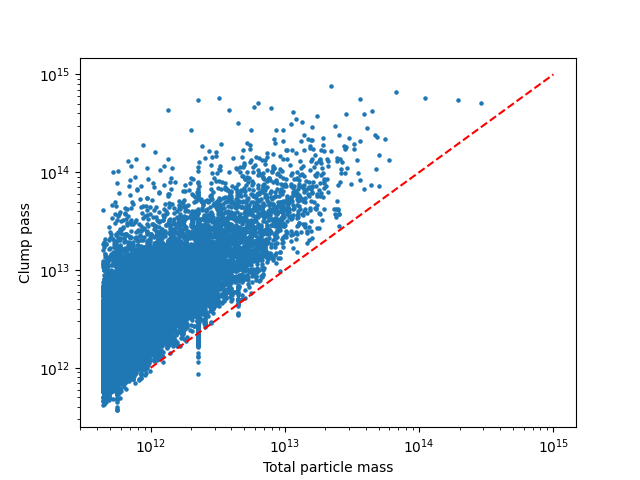

In [56]:
plt.figure()

plt.scatter(box.box2solarmass(d["totpartmass"][mask]), cat["mass_cl"][mask], s=5)
t = np.linspace(1e12, 1e15, 1000)
plt.plot(t, t, c="red", ls="--")
plt.xlabel("Total particle mass")
plt.ylabel("Clump pass")

plt.xscale("log")
plt.yscale("log")

plt.show()

In [25]:
cat.ismain

array([ True,  True,  True, ...,  True,  True,  True])

In [10]:
cat["index"]

array([       1,        2,        3, ..., 21795797, 21796004, 21796370],
      dtype=int32)

In [15]:
np.where(cat["parent"] == 2)

(array([  1,  67, 122, 137, 148, 237]),)

In [4]:
clumpsarr["index"]

clid = 2


parts = particle_archive[str(clid)]
cl = clumpsarr[clumpid2arrpos[clid]]
obj = csiborgtools.fits.Clump(parts, cl, box)

In [5]:
obj.spherical_overdensity_mass(200, kind="matter")

../csiborgtools/fits/halo.py:249: RuntimeWarning: divide by zero encountered in divide
  ks = numpy.where(cmass / vol > target_density)[0]


(0.001235018, 1.5799887e-06)

In [46]:
r = obj.r()
rmin = np.min(r)
rmax, mtot = obj.spherical_overdensity_mass(200)
npart = np.sum((rmin <= r) & (r <= rmax))
mask = (rmin <= r) & (r <= rmax)
r = r[mask]

print(npart)

nfwpost = csiborgtools.fits.NFWPosterior()

# Loss function to optimize
def loss(logRs):
    return -nfwpost(logRs, r, rmin, rmax, npart)

10516


In [49]:
Rs, sigma0 = nfwpost.fit(obj)

Rs, sigma0

../csiborgtools/fits/halo.py:219: RuntimeWarning: divide by zero encountered in divide
  ks = numpy.where(cmass / vol > delta_mult * self.box.box_rhoc)[0]


(0.00015905314038126183, 25986.37806787761)

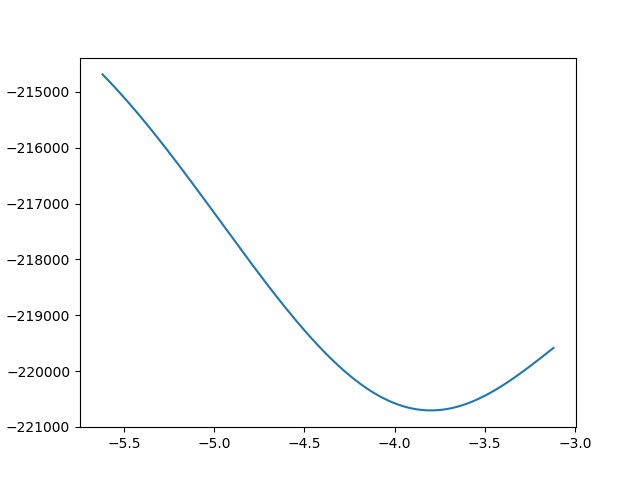

In [39]:
xrange = np.linspace(np.log10(rmin), np.log10(rmax), 1000)
y = [loss(t) for t in xrange]


plt.figure()
plt.plot(xrange, y)
plt.show()

In [40]:
r = obj.r()
mask = np.argsort(r)
r = r[mask]
cmass = np.cumsum(obj['M'][mask])
vol = 4/3*np.pi * (r**3 - r.min()**3)

In [41]:
nfw = csiborgtools.fits.NFWProfile()

/tmp/ipykernel_32044/1102236936.py:2: RuntimeWarning: divide by zero encountered in divide
  plt.plot(r, cmass / vol)
/tmp/ipykernel_32044/1102236936.py:4: RuntimeWarning: divide by zero encountered in divide
  plt.plot(r, nfw.bounded_mass(rmin, r, Rs, sigma0) / vol)


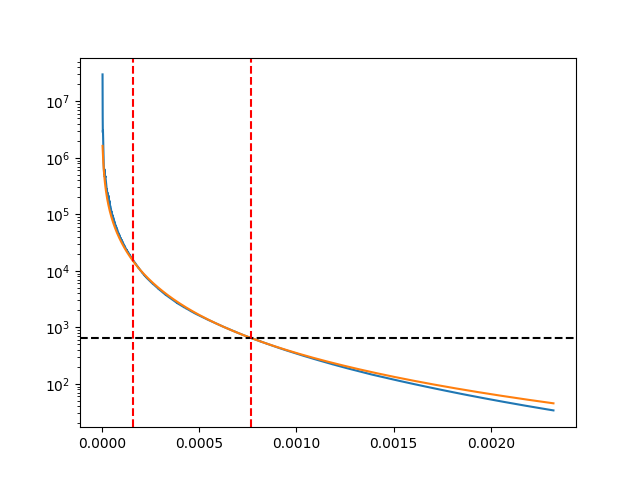

In [44]:
plt.figure()
plt.plot(r, cmass / vol)

plt.plot(r, nfw.bounded_mass(rmin, r, Rs, sigma0) / vol)

plt.axhline(200* box.box_rhoc, color="k", ls="--")
plt.axvline(Rs, color="red", ls="--")
plt.axvline(rmax, color="red", ls="--")



# plt.xscale("log")
plt.yscale("log")
plt.show()

In [61]:
np.linalg.norm(obj.angular_momentum())

9.566224e-15